### Import all necesary libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


### Import Set Of Images

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Import all necessary resources

In [140]:
img1 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/real_world_images/2.jpg') # queryImage

In [114]:

img2 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards/0.jpg') # trainImage
database_images = load_images_from_folder("/home/yogesh/Desktop/CS/cloudArchitecture/resources/school_bag")
# database_images = load_images_from_folder("/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards")


# img1_SIFT = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2_SIFT =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


img1_SIFT = img1
img2_SIFT = img2


### Show Query Image

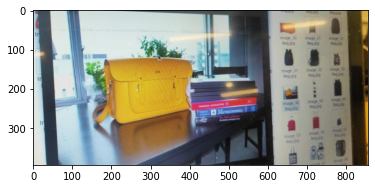

In [141]:
img_test = img1

img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

### Initialize the keyoint extractor

In [6]:
orb = cv2.ORB_create()
sift = cv2.SIFT_create()
brisk = cv2.BRISK_create()

### Initilizing the matcher 

In [53]:
bf = cv2.BFMatcher()
FLANN_matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
flann_params= dict(algorithm = 6,
                               table_number = 6, # 12
                               key_size = 12,     # 20
                               multi_probe_level = 1) #2
FLANN_BRISK_matcher = cv2.FlannBasedMatcher(flann_params, {})


## Matching  images

####  Select Algoritm and matcher

In [8]:
matching_methods = ["BF_matcher","FLANN_matcher"]

In [9]:
feature_extractions = ["ORB", "SIFT","BRISK"]


In [56]:
matcher_selection = int(input())

1


In [57]:
feature_selection = int(input())

0


In [58]:
print(matching_methods[matcher_selection])
print(feature_extractions[feature_selection])

FLANN_matcher
ORB


### Computing keypoints of database

### computing keypoints for all images in data base

In [123]:
kps_database =[]
des_database = []
kps_temp= None
des_temp =None
i=0
for imgi in database_images:
    if feature_selection == 0:
        kps_temp,des_temp = orb.detectAndCompute(imgi,None)
    elif feature_selection ==1 :
        kps_temp,des_temp = sift.detectAndCompute(imgi,None)
    elif feature_selection ==2 :
        kps_temp,des_temp = brisk.detectAndCompute(imgi,None)
    kps_database.append(kps_temp)
    des_database.append(des_temp)
    

In [124]:
print(len(kps_database))

100


### Computing keypoints in Query image

In [142]:
kp1=None
kp2 =None
des1=None
des2=None
if feature_selection ==0:
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
elif feature_selection == 1:
    kp1, des1 = sift.detectAndCompute(img1_SIFT,None)
    kp2, des2 = sift.detectAndCompute(img2_SIFT,None)
elif feature_selection ==2:
    kp1, des1 = brisk.detectAndCompute(img1_SIFT,None)
    kp2, des2 = brisk.detectAndCompute(img2_SIFT,None)

### Matching Start

In [143]:
matches = []
matches_temp =None

for descriptors in des_database:
    if(matcher_selection ==0 ):
        matches_temp = bf.knnMatch(des1,descriptors, k=2)

    elif(matcher_selection == 1 and feature_selection ==1):
        matches_temp = FLANN_matcher.knnMatch(des1,descriptors, 2)
    elif(matcher_selection == 1 and feature_selection ==2):
        matches_temp = FLANN_BRISK_matcher.knnMatch(des1,descriptors, 2)
    elif (matcher_selection == 1 and feature_selection ==0):
        matches_temp = FLANN_BRISK_matcher.knnMatch(des1,descriptors, 2)
    matches.append(matches_temp)



In [144]:
goods =[]

for mat in matches:
    good = []
    for m_n in mat:
        if len(m_n)!=2:
            continue
        (m,n) = m_n
        if m.distance < 0.7* n.distance:
            good.append(m)
    goods.append(len(good))

print(len(goods))
print(goods)

100
[14, 12, 5, 1, 3, 5, 3, 6, 7, 3, 6, 4, 2, 2, 2, 8, 4, 5, 8, 6, 1, 3, 2, 2, 3, 3, 4, 7, 5, 4, 4, 2, 6, 6, 6, 3, 5, 4, 7, 7, 2, 15, 5, 3, 5, 5, 5, 5, 6, 9, 2, 3, 2, 3, 6, 3, 0, 2, 4, 1, 2, 2, 0, 5, 11, 10, 2, 6, 3, 3, 9, 4, 3, 9, 3, 8, 3, 2, 1, 3, 0, 5, 11, 6, 7, 8, 12, 3, 161, 2, 6, 2, 5, 4, 2, 1, 4, 3, 2, 4]


In [145]:
max_value = max(goods)

max_index= goods.index(max_value)

print(max_value)
print(max_index)

161
88


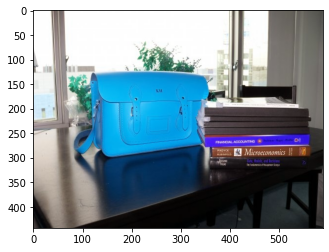

In [139]:
plt.imshow(database_images[max_index])

### Draw Matches

In [20]:
imgFeatures = cv2.drawMatches(img1,feature_keypoints[feature_selection][0] , img2, feature_keypoints[feature_selection][1], good, None, flags=2)

NameError: name 'feature_keypoints' is not defined

In [ ]:
plt.imshow(imgFeatures)